# Homework 1
Paula Campaña Donoso (00215572)

In [21]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.Assume we implemented an algorithm that has complexity approximately $n log(n)$. How much faster is this implementation compared to one of complexity $n^2$?

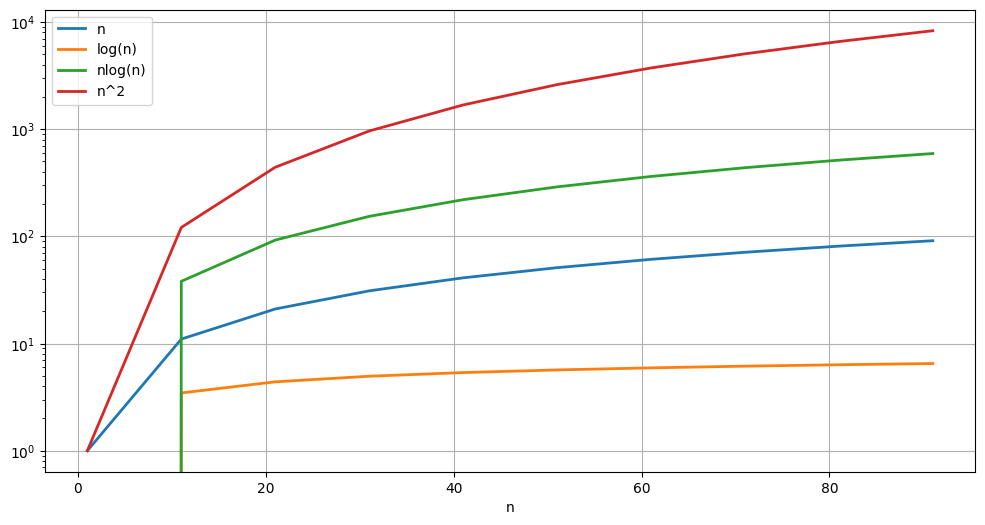

In [22]:
"""
Este codigo revisamos en clase, use la misma base, sin embargo para poder comparar $n log(n)$ con $n^2$ lo que hice fue mantener las funciones que necesitaba y eliminar las que no, por eso en la grafica se realizan cuatro curvas en vez de 2
"""
r = pd.DataFrame()
r['n'] = np.arange(1, 100, 10)
r['n1'] = np.arange(1, 100, 10)
r['log(n)'] = np.log2(r['n'])
r['nlog(n)'] = r['n'] * r['log(n)']
r['n^2'] = np.power(r['n'], 2)

r.plot(x='n1', logy=True, lw=2, figsize=(12, 6))
plt.xlabel('n')
plt.grid()

### 2. The runtime of an algorithm is captured in the following table:

As precissely as possible, estimate the function that describes the growth of the runtime 

|$n$  | runtime -- $T(n)$|
|---- | ----- |
|1000|0.0|
|2000|0.02|
|4000|0.2|
|8000|0.6|
|16000|2.6|
|32000|10.4|
|64000|41.6|

![plot](../Deber_1/Ejercicio_2.png)
Aqui lo que hice fue pasar la tabla a Excel y graficar los datos, despues poner de acuerdo a la grafica la funcion de como
describir el crecimiento de runtime

### 3. By estimating the number of operations as a function of $n$, estimate the complexity of the following function

Siguiendo el formato de la clase inclui dos listas una de costo y una de veces, para poder estimar la complejidad de
la funcion en la parte inferior
```
def func1(n):
    A = range(0,n)
    sum = 0
    i = 0
    for x in A[i:]:
        i += 1
        for j in range(i, len(A)):
            y = A[j]
            k = j
            while k < len(A):
                z = A[k]
                k = 2*k
                if x + y <= z:
                    sum += 1
    return sum
```

In [23]:
"""
def func1(n):                                        cost         times
    A = range(0,n)                                   c1           n
    sum = 0                                          c2           1
    i = 0                                            c3           1
    for x in A[i:]:                                  c4           n
        i += 1                                       c5           n
        for j in range(i, len(A)):                   c6           n-1
            y = A[j]                                 c7           n-1
            k = j                                    c8           n-1
            while k < len(A):                        c9           sumatoria de n veces y k = 1, Funcion: (t_k - 1)
                z = A[k]                             c10          sumatoria de n veces y k = 1, Funcion: (t_k - 1)
                k = 2*k                              c11          sumatoria de n veces y k = 1, Funcion: (t_k - 1)
                if x + y <= z:                       c12          sumatoria de n veces y k = 1, Funcion: (t_k - 1)
                    sum += 1                         c13          sumatoria de n veces y k = 1, Funcion: (t_k - 1)
    return sum
"""

'\ndef func1(n):                                        cost         times\n    A = range(0,n)                                   c1           n\n    sum = 0                                          c2           1\n    i = 0                                            c3           1\n    for x in A[i:]:                                  c4           n\n        i += 1                                       c5           n\n        for j in range(i, len(A)):                   c6           n-1\n            y = A[j]                                 c7           n-1\n            k = j                                    c8           n-1\n            while k < len(A):                        c9           sumatoria de n veces y k = 1, Funcion: (t_k - 1)\n                z = A[k]                             c10          sumatoria de n veces y k = 1, Funcion: (t_k - 1)\n                k = 2*k                              c11          sumatoria de n veces y k = 1, Funcion: (t_k - 1)\n                if

### Total Time
> $T(n) = c_1n + c_2(1) + c_3(1) + c_4n + c_5n + c_6(n-1) + c_7(n-1) + c_8(n-1) + c_9 \sum_{k=1}^n (k_j-1) + c_1_0 \sum_{k=1}^n (k_j-1) + c_1_1 \sum_{k=1}^n (k_j-1) + c_1_2 \sum_{k=1}^n (k_j-1) + c_1_3 \sum_{k=1}^n (k_j-1)$

> $T(n) = (c_1 + c_4 + c_5 + c_6 + c_7 + c_8)n + (c_2 + c_3 - c_6 - c_7 - c_8) + c_9 \sum_{k=1}^n (k_j-1) + c_1_0 \sum_{k=1}^n (k_j-1) + c_1_1 \sum_{k=1}^n (k_j-1) + c_1_2 \sum_{k=1}^n (k_j-1) + c_1_3 \sum_{k=1}^n (k_j-1)$

Debido a que se tiene 3 loops un for, luego otro for adentro del for principal y luego un while dentro del for que esta
adentro del primer for entonces se tiene el siguiente nivel de complejidad
$O(n^3)$

### 4. From class, remember the code we use to get the sum of the first $n$ positive integers:

```
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```

Now consider a different function that does the same thing.

```
def sum2(n): 
    total = n*(n+1)//2
    return total
```

1. Run the two functions and make sure that they return the same outputs. Use $n = 5, 8, 103, 527$
2. Use Python time library to estimate the runtime for inputs of $n = [1, 10, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8, 10^9]$
3. Plot the runtime as a function of $n$ for both functions in the same figure. 
    - Use different line colors and markers to help distinguish between the two curves. 
4. Analytically estime the runtime functions for the functions `sum1` and `sum2`. Call them $T_1(n)$ and $T_2(n)$.
    - Note that the times obtained in your computer will be different to the ones shown in class since the speed and memory of the computers used to run the code are likely different
5. How long will it take to run the code for $n = 10^{100}$ using `sum1` and `sum2`? What are your main impressions about the difference?

**Hint:** Use and modify the code from the slides to get and plot the runtime


Aqui lo que hice fue guiarme de los ejercicios que hemos hecho en clase para adaptarle en este ejercicio del deber

In [24]:
#Utilizando ayuda de internet en la pagina de geek for geeks utilizo la funcion decoradora de tiempo para poder calcular el tiempo de ejecucion, y luego llamo a mi funcion @timer_func para funcion de sum1 y sum2
from time import time

def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.4f}s')
        return result
    return wrap_func

In [25]:
@timer_func
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total

In [26]:
@timer_func
def sum2(n):
    total = n*(n+1)//2
    return total

In [27]:
#Aqui lo que hago es imprimir en pantalla los valores que dan de resultado la funcion sum1 y sum2
n_val = [5,8,103,527]
resultados_sum1 = [sum1(n) for n in n_val]
resultados_sum2 = [sum2(n) for n in n_val]
print(resultados_sum1)
print(resultados_sum2)

Function 'sum1' executed in 0.0000s
Function 'sum1' executed in 0.0000s
Function 'sum1' executed in 0.0000s
Function 'sum1' executed in 0.0000s
Function 'sum2' executed in 0.0000s
Function 'sum2' executed in 0.0000s
Function 'sum2' executed in 0.0000s
Function 'sum2' executed in 0.0000s
[15, 36, 5356, 139128]
[15, 36, 5356, 139128]


In [28]:
#Utilizando ayuda de internet en la pagina de geek for geeks utilizo la funcion decoradora de tiempo para poder calcular el tiempo de ejecucion, y luego llamo a mi funcion @timer_func para funcion de sum1 y sum2
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.4f}s')
        return t2-t1
    return wrap_func

@timer_func
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total

@timer_func
def sum2(n):
    total = n*(n+1)//2
    return total

In [29]:
#Cree una lista de valores y llamo a mis funciones sum1 y sum 2 e imprimo en pantalla el tiempo de ejecucion de cada funcion
n1 = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
run_time1 = [sum1(n) for n in n1]
run_time2 = [sum2(n) for n in n1]

Function 'sum1' executed in 0.0000s
Function 'sum1' executed in 0.0000s
Function 'sum1' executed in 0.0000s
Function 'sum1' executed in 0.0001s
Function 'sum1' executed in 0.0007s
Function 'sum1' executed in 0.0061s
Function 'sum1' executed in 0.0627s
Function 'sum1' executed in 0.5808s
Function 'sum1' executed in 5.5665s
Function 'sum1' executed in 54.1447s
Function 'sum2' executed in 0.0000s
Function 'sum2' executed in 0.0000s
Function 'sum2' executed in 0.0000s
Function 'sum2' executed in 0.0000s
Function 'sum2' executed in 0.0000s
Function 'sum2' executed in 0.0000s
Function 'sum2' executed in 0.0000s
Function 'sum2' executed in 0.0000s
Function 'sum2' executed in 0.0000s
Function 'sum2' executed in 0.0000s


In [30]:
print(run_time1)
print(run_time2)

[3.0994415283203125e-06, 2.86102294921875e-06, 7.152557373046875e-06, 7.510185241699219e-05, 0.0007448196411132812, 0.006136894226074219, 0.06271600723266602, 0.5808258056640625, 5.566485166549683, 54.14473605155945]
[2.1457672119140625e-06, 0.0, 0.0, 0.0, 9.5367431640625e-07, 9.5367431640625e-07, 9.5367431640625e-07, 0.0, 0.0, 0.0]


In [31]:
#Aqui lo que hago es mostrar en una tabla los valores de la lista y el valor que le toma ejecutar la funcion sum1
df1 = pd.DataFrame(zip(n1,run_time1))
df1.columns = ['n','T(n)']
df1

,n,T(n)
0,1,0.000003
1,10,0.000003
2,100,0.000007
3,1000,0.000075
4,10000,0.000745
5,100000,0.006137
6,1000000,0.062716
7,10000000,0.580826
8,100000000,5.566485
9,1000000000,54.144736


Hice dos graficos por separado debido a que tengo dos tablas con datos, y que se me hizo visualmente mas facil tener
dos graficos que me indiquen el crecimiento de runtime con respecto a los valores en n

<AxesSubplot: xlabel='n'>

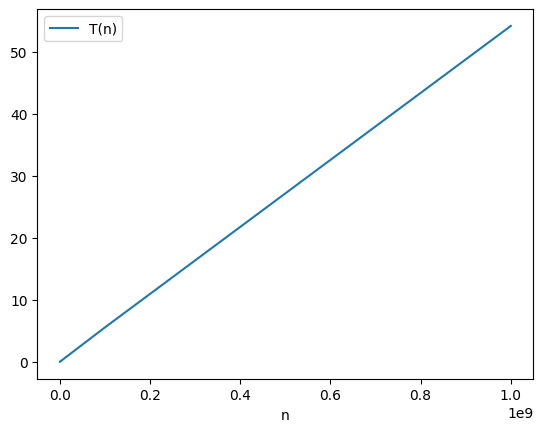

In [32]:
#Grafico la linea que muestra la relacion entre los valores n y el runtime
df1.plot(x = "n", y = "T(n)")

In [33]:
#Realizo la misma funcion de la tabla para la funcion sum2
df2 = pd.DataFrame(zip(n1,run_time2))
df2.columns = ['n','T(n)']
df2

,n,T(n)
0,1,2.145767e-06
1,10,0.000000e+00
2,100,0.000000e+00
3,1000,0.000000e+00
4,10000,9.536743e-07
5,100000,9.536743e-07
6,1000000,9.536743e-07
7,10000000,0.000000e+00
8,100000000,0.000000e+00
9,1000000000,0.000000e+00


<AxesSubplot: xlabel='n'>

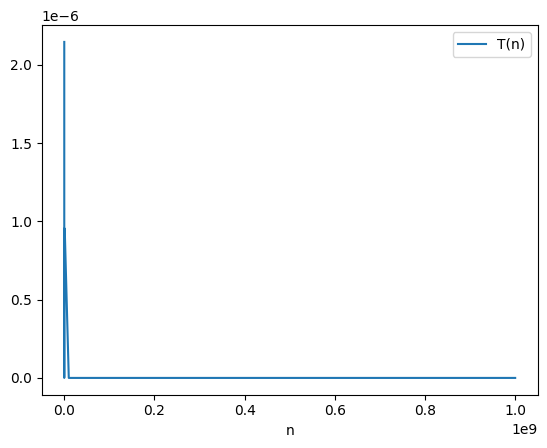

In [34]:
#Grafico la relacion entre los valores n y el tiempo de ejecucion de la funcion sum2
df2.plot(x = "n", y = "T(n)")

$T_1(n) = c_1(2) + c_2n + c_3n$

$T_1(n)=2c_1 + (c_2 + c_3)n$

$T_2(n)=1$

sum1(n) = > $O(n)$
sum2(n) = > $O(1)$

Para esto traspase los valores a Excel y saque las ecuaciones para sum1 y sum2 para calcular cuanto se demora calcular 10^100^

La funcion para sum1 es y= 0,6088x - 6x10^6^

Si se calcula 10^100^ con sum1 la respuesta es = 6.08x10^99^

La funcion para sum2 es y= (8x10^-10^)x + 0,2152

Si se calcula 10^100^ con sum2 la respuesta es = 8x10^90^

### 5. Prove that the running time of an algorithm is $\Theta(g(n))$ if and only if its worst-case running time is $O(g(n))$ and its best-case running time is $\Omega(g(n))$

Para demostrar este ejercicio utilizare lo que hicimos en clase para entender el tiempo de ejecucion $\Theta(g(n))$, $O(g(n))$ y $\Omega(g(n))$
6^n^ y 3^n^

$6^n$ is $O(3^n)$

$6^n$ is $\Theta(3^n)$

$6^n$ is $\Omega(3^n)$

$6^n \leq c_2 \times 3^n, \forall n\geq n_0$

Para $O(n)$ tengo que demostrar que c es constante, pero no cumple porque depende de n por lo tanto 3^n^ es $O(6^n)$

$0 \leq c_1 \times 3^n \leq 6^n, \forall n\geq n_0$

Para $\Omega(n)$ tengo que demostrar que cumpla que c_3^n^ < = 6^n^, en clase demostramos que si se puede utilizando los valores n = 1 para que cumpla la desiguladad y que c < = 2

Finalmente para que el tiempo de ejecucion sea $\Theta(g(n))$ entonces $O(g(n))$ tiene que ser upper bound lo que si cumple y $\Omega(g(n))$ tiene que ser upper bound lo que si cumple, cumpliendo que $\Theta(g(n))$ si es el tiempo de ejecucion

### 6.  Sort the following functions in decreasing order of asymptotic complexity ($O(f(n))$):

- $f_1(n) = \sqrt{n}$
- $f_2(n) = n^3$
- $f_3(n) = {n\choose 4}$
- $f_4(n) = \sum_{i=2}^n (i-1)$

Se utilizo excel para graficar cada funcion por esta razon el orden seria el siguiente
- $f_3(n) = {n\choose 4}$
- $f_2(n) = n^3$
- $f_4(n) = \sum_{i=2}^n (i-1)$
- $f_1(n) = \sqrt{n}$

![plot](../Deber_1/Ejercicio_6.png)
Adjunte imagen de las lineas graficadas en Excel para poder ver la posicion a la que se le pusiera a cada funcion de manera descendente


### 7. Implement the methods of the class `Array` that deal with deletion of elements. Consider the 3 cases we considered in class.

In [35]:
import ctypes

class Array(object):
    """
    Implementation of the array data structure
    """
    #constructor
    def __init__(self, n, values=None):
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n)
        if values:
            self.initialize_array(values)

    def initialize_array(self, values):
        """
        Initialize array
        """
        if self.n != len(values):
            raise ValueError("element count different than capacity")
        for item in values:
            self.array[self.l] = item
            self.l += 1

    def _create_array(self, n):
        """
        Creates a new array of capacity n
        """
        return (n * ctypes.py_object)()

    def __getitem__(self, item_index):
        """
        Return element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        try:
            x = self.array[item_index]
        except ValueError:
            x = None
        return x

    def __setitem__(self, item_index, item):
        """
        Set element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        self.array[item_index] = item

    def list_array(self):
        """
        List elements of the array
        using list comprehension
        """
        return ", ".join(str(x) if x is not None else '_' for x in self)

    def list_array2(self):
        y = []
        for x in self:
            if x is not None:
                y.append(str(x))
            else:
                y.append('_')
        return ", ".join(y)

    def insert_to_tail(self, item):
        """
        Add new item to the tail of the array
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.array[self.l] = item
        self.l += 1

    def insert_to_head(self, item):
        """
        Add new item to the beginning of the array
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        i = self.l
        while (i > 0):
            self.array[i] = self.array[i-1]
            i -= 1
        self.array[0] = item
        self.l += 1

    def insert(self, index, element):
        """
        implementation of insert
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        if (index < 0) or (index > self.l):
            raise IndexError('index out of range!')
        x = self.l
        while x > index:
            self.array[x] = self.array[x-1]
            x -= 1
        self.array[index] = element
        self.l += 1

    def linear_search(self, element):
        """
        Return the index of element
        """
        for i in range(self.l):
            if self[i] == element:
                return i
        return None

In [36]:
a = Array(5, ["paula","domenica","campana","donoso","estructuras"])

In [37]:
a.list_array()

'paula, domenica, campana, donoso, estructuras'

In [38]:
b = Array(6,[])

In [39]:
b.list_array()

'_, _, _, _, _, _'

In [40]:
#Cree una clase Array que tendra una funcion que eliminara el ultimo valor de mi arreglo, estableciendo que el ultimo valor sera nulo
class Array(Array):
    def delete_tail(self):
        self.array[self.l - 1] = None

In [41]:
a = Array(5, ["paula","domenica","campana","donoso","estructuras"])
a.list_array()

'paula, domenica, campana, donoso, estructuras'

In [42]:
a.delete_tail()
a.list_array()

'paula, domenica, campana, donoso, _'

In [43]:
#Vuelvo a crear una clase arreglo, ahora eliminare el valor que este en el inicio de mi arreglo, para eso digo que tendre una variable de tipo i que empezara en 0, esto me permitira hacer una comparacion entre los elementos de mi arreglo para moverlos un espacio a la izquierda y que el espacio vacio que quedaba despues de eliminar el primer valor no quede vacio
class Array(Array):
    def delete_head(self):
        i = 0
        while(i < self.l):
            try:
                self.array[i] = self.array[i+1]
                i += 1
            except:
                self.array[self.l - 1] = None
                return
        self.l -= 1

In [44]:
a = Array(5, ["paula","domenica","campana","donoso","estructuras"])
a.list_array()

'paula, domenica, campana, donoso, estructuras'

In [45]:
a.delete_head()
a.list_array()

'domenica, campana, donoso, estructuras, _'

In [46]:
#Aqui vuelvo a crear una clase de tipo array, ahora en cambio vuelvo a tener una variable i pero esta vez es igual al index, esto me permite a mi llamar al espacio que deseo eliminar y luego utilizando un lazo while, puedo ir haciendo una comparacion entre los elementos para poder mover los elementos a la derecha despues de haber eliminado un valor en el medio del arreglo y que dicho espacio no quede vacio, sino que quede nulo el espacio al final
class Array(Array):
    def delete_index(self,index):
        i = index
        while(i < self.l):
            try:
                self.array[i] = self.array[i+1]
                i += 1
            except:
                self.array[self.l - 1] = None
                return
        self.l -= 1

In [47]:
a = Array(5, ["paula","domenica","campana","donoso","estructuras"])
a.list_array()

'paula, domenica, campana, donoso, estructuras'

In [48]:
a.delete_index(2)
a.list_array()

'paula, domenica, donoso, estructuras, _'